In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('tile_df.csv')

In [11]:
df.columns

Index(['UPRN', 'uprn_geometry', 'id_building', 'featureCode',
       'geometry_building', 'dist_building', 'id_street', 'endNode',
       'startNode', 'roadNumberTOID', 'roadNameTOID', 'fictitious',
       'roadClassification', 'roadFunction', 'formOfWay', 'length',
       'length_uom', 'loop', 'primaryRoute', 'trunkRoad',
       'roadClassificationNumber', 'name1', 'name1_lang', 'name2',
       'name2_lang', 'roadStructure', 'geometry_street', 'dist_street',
       'residential', 'short_street', 'res_or_short', 'community'],
      dtype='object')

In [15]:
len(df)

15163

In [16]:
len(df.UPRN.unique())

15163

In [17]:
df.UPRN[0]

38000001

In [14]:
# this is a dataframe for all the UPRN within the tile (buffered by 1, cf. nbhd.geography.Neighbourhood.get_communities())

In [18]:
df.uprn_geometry[0]

'0101000020346C0000000000003CB81441000000003CE91741'

In [19]:
# geometry is in 'well-known binary' because of how I handled it in the initial import

In [20]:
from shapely.geometry import Point

In [21]:
import geopandas as gpd

In [24]:
gpd.GeoSeries.from_wkb(df.uprn_geometry) # turn it from wkb to shapely Points (in a gpd.GeoSeries)

0        POINT (339471.000 391759.000)
1        POINT (339474.000 391753.000)
2        POINT (339474.000 391748.000)
3        POINT (339475.000 391742.000)
4        POINT (339475.000 391736.000)
                     ...              
15158    POINT (339717.000 391662.000)
15159    POINT (339733.000 391630.000)
15160    POINT (339722.000 391662.000)
15161    POINT (339729.000 391661.000)
15162    POINT (339742.000 391663.000)
Length: 15163, dtype: geometry

In [48]:
df.id_building

0        id339E7AF1-7293-4A9B-869D-E784D13C829F
1        id339E7AF1-7293-4A9B-869D-E784D13C829F
2        id339E7AF1-7293-4A9B-869D-E784D13C829F
3        id339E7AF1-7293-4A9B-869D-E784D13C829F
4        id339E7AF1-7293-4A9B-869D-E784D13C829F
                          ...                  
15158    id09CC6713-6ADD-450C-9CCE-D785D3B9E75D
15159    id2193B695-AF2D-44A8-9C8B-783744458EDE
15160    id09CC6713-6ADD-450C-9CCE-D785D3B9E75D
15161    id09CC6713-6ADD-450C-9CCE-D785D3B9E75D
15162    id262675BA-F266-4E2A-B6DC-86BF950E4585
Name: id_building, Length: 15163, dtype: object

In [54]:
unique_buildings = df.id_building.unique()
len(unique_buildings)

1877

In [26]:
# this is the nearest building for each UPRN, they overlap inefficiently, as the same building may be nearest to multiple UPRN

In [30]:
df.featureCode.unique() # this is an Ordnance Survey thing, it means nothing to me

array([15014])

In [32]:
df.geometry_building # these are the nearest building polygons

0        POLYGON ((339479.68 391722.29, 339476.27 39176...
1        POLYGON ((339479.68 391722.29, 339476.27 39176...
2        POLYGON ((339479.68 391722.29, 339476.27 39176...
3        POLYGON ((339479.68 391722.29, 339476.27 39176...
4        POLYGON ((339479.68 391722.29, 339476.27 39176...
                               ...                        
15158    POLYGON ((339697.48 391671.5, 339696.19 391661...
15159    POLYGON ((339696.19 391639.41, 339694.93 39162...
15160    POLYGON ((339697.48 391671.5, 339696.19 391661...
15161    POLYGON ((339697.48 391671.5, 339696.19 391661...
15162    POLYGON ((339749.65 391665.91, 339743.38 39167...
Name: geometry_building, Length: 15163, dtype: object

In [34]:
df.geometry_building[0] # actually they are text strings

'POLYGON ((339479.68 391722.29, 339476.27 391762.39, 339465.88 391761.51, 339469.29 391721.41, 339479.68 391722.29))'

In [103]:
df['load_bdg_geometry'] = gpd.GeoSeries.from_wkt(df.geometry_building) # transform them from 'well-known text'

In [37]:
df.dist_building # distance between UPRN and building

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15158    0.0
15159    0.0
15160    0.0
15161    0.0
15162    0.0
Name: dist_building, Length: 15163, dtype: float64

<AxesSubplot:ylabel='Density'>

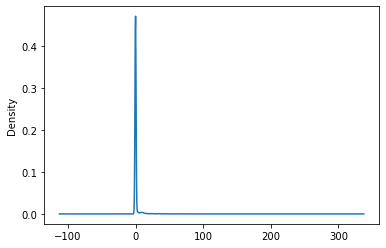

In [39]:
df.dist_building.plot.kde()

<AxesSubplot:ylabel='Density'>

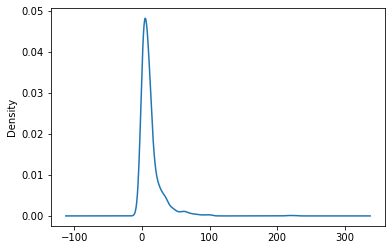

In [42]:
df.loc[df.dist_building>0].dist_building.plot.kde()

In [38]:
# more interesting is whether points are in buildings or represent other sorts of property

In [44]:
len(df.loc[df.dist_building==0])

14154

In [47]:
len(df.loc[df.dist_building==0])/len(df)*100

93.3456440018466

In [52]:
bdg_uprn = df.loc[df.dist_building==0]


In [55]:
len(bdg_uprn)/len(unique_buildings) # initial average density

7.54075652637187

In [59]:
df.id_building.value_counts().head(20) # but we can be specific

id67370B36-5C8B-46FE-A027-52BAD79D429B    155
id66CDA0DB-2674-4ACB-AFF8-2741AD098785    122
id0F7CB75A-81FE-44D9-828A-7919C539E38E    111
idE0D4DC46-5799-4A83-9D29-D1984D5028A9     93
id6E3A121B-141F-4153-8A7E-183F8606A7F2     83
id0CEE409E-E39E-40FB-9319-111E7594E1D9     82
id80DB090A-9EC3-407B-AF69-EC58530AD263     76
id0578CE3C-9CE1-4DE3-965F-F8599CF0F5A5     71
idFF9368AE-4E30-4E41-ABA5-EF9D904EEC2D     66
id9A06A6AC-06E4-4EE7-934B-A48DBD71AA24     61
idDC555441-DF28-47E3-958D-F8C1F95A87C6     60
idFA3A3E4B-3570-4D30-987A-BCA90F17C00E     56
id146F95AF-133C-4C95-8E50-B7B5A42CD174     54
id2C56D243-E810-4396-BF04-1BD0616BA389     53
id7DECA824-1C90-4F9E-9036-C6CF042F4E45     53
id0F79EB87-7A7D-4E9A-A044-193A52EE9D2B     52
id9E39817A-4402-4AAB-93C0-C4D5E2883BEF     52
id22F96986-8AC7-4041-8712-9F94B97F8871     52
idD3531510-871B-4054-84B2-64216B295801     51
id0302249F-0C5B-488C-A9B9-01776582E8BE     51
Name: id_building, dtype: int64

In [64]:
building_counts = pd.DataFrame(df.id_building.value_counts())

In [68]:
building_counts.loc[building_counts['id_building']==0] 
# because we got these through nearest neighbours, if they're not nearest to a point they don't feature in the analysis

,id_building


In [71]:
building_counts.loc[building_counts['id_building']==1] # 128 buildings just have one property

,id_building
id1E65B54B-F527-4CB6-BDD6-AA604C3C47E0,1
idE7A103E6-E125-4754-B5CC-29B524A9E4E1,1
id088DE225-6B99-45F6-A95A-202330D8082F,1
idE0AF6A78-C979-4842-8A41-58614CE81FF9,1
id5C6D0608-D1B3-4083-8BDF-27D29105978A,1
...,...
idFB36848B-DB3D-48ED-A4F0-129073ABAEBA,1
id12353017-13BC-4AA3-BDB9-611A029AB2E6,1
id2046E700-3278-474F-A29A-4D8294D4B3D7,1
id3034DD89-EEDF-4E0C-ABFC-E6D0B7389CEE,1


In [72]:
single = building_counts.loc[building_counts['id_building']==1] # 128 buildings just have one property

In [74]:
len(single)

128

In [75]:
len(single)/len(unique_buildings)

0.06819392647842301

In [76]:
semidetached = double = building_counts.loc[building_counts['id_building']==2]

In [77]:
len(semidetached)

559

In [78]:
len(semidetached)/len(unique_buildings)

0.297815663292488

In [79]:
other = building_counts.loc[building_counts['id_building']>2]

In [80]:
len(other)

1190

<AxesSubplot:>

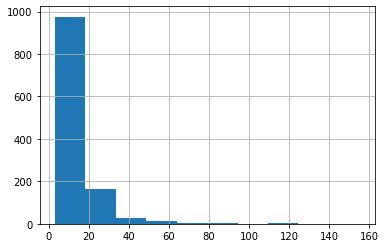

In [81]:
other.id_building.hist(bins=10)

In [85]:
d = dict(df.id_building.value_counts())

In [87]:
df['uprn_per_building'] = df.id_building.apply(lambda x: d.get(x))

In [97]:
df['bdg_area_per_uprn'] = gpd.GeoDataFrame(geometry=df.load_bdg_geometry).geometry.area / df.uprn_per_building

<AxesSubplot:ylabel='Density'>

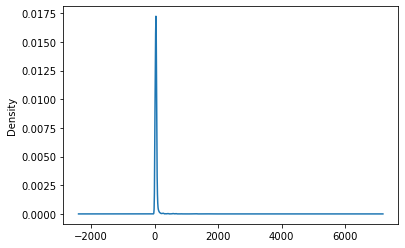

In [98]:
df.bdg_area_per_uprn.plot.kde()

<AxesSubplot:>

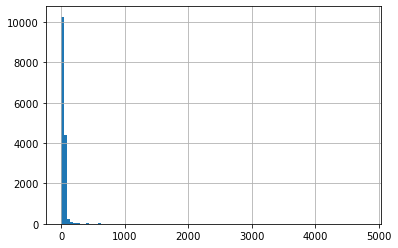

In [99]:
df.bdg_area_per_uprn.hist(bins=100)

In [100]:
df.bdg_area_per_uprn.describe()

count    15163.000000
mean        50.633310
std         86.008663
min          3.483086
25%         27.253615
50%         44.222309
75%         54.479821
max       4789.423550
Name: bdg_area_per_uprn, dtype: float64

In [114]:
df[['bdg_area_per_uprn','uprn_per_building']].sort_values('bdg_area_per_uprn', ascending=False).head(50)

,bdg_area_per_uprn,uprn_per_building
2054,4789.423550,1
3719,3639.098650,1
736,2164.686500,1
1700,1756.956167,3
13449,1756.956167,3
11961,1756.956167,3
12531,1739.517050,1
2047,1704.902700,3
13428,1704.902700,3
12793,1704.902700,3


In [113]:
df[['bdg_area_per_uprn','uprn_per_building']].sort_values('bdg_area_per_uprn', ascending=False).iloc[51:100]

,bdg_area_per_uprn,uprn_per_building
6000,588.184230,5
13534,588.184230,5
13227,588.184230,5
13427,588.184230,5
14152,582.068036,7
11939,582.068036,7
8107,582.068036,7
11987,582.068036,7
12059,582.068036,7
8117,582.068036,7


In [104]:
gdf = gpd.GeoDataFrame(df, geometry=df.load_bdg_geometry)

<AxesSubplot:>

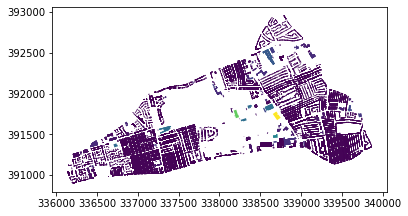

In [105]:
gdf.plot('bdg_area_per_uprn')

<AxesSubplot:>

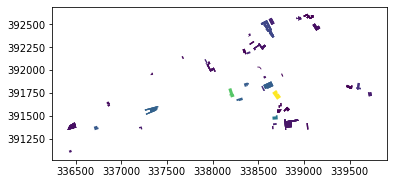

In [115]:
gdf.loc[gdf.bdg_area_per_uprn > 400].plot('bdg_area_per_uprn')

In [119]:
from shapely.geometry import MultiPolygon

In [122]:
big_bdgs = MultiPolygon(list(gdf.geometry.values))

In [123]:
import sys

In [124]:
sys.path.append('..')

In [125]:
from nbhd.data import Base

Initializing database connection...
Database connected!


In [126]:
db = Base()

In [127]:
names = db.contains('opennames', big_bdgs)

In [132]:
names.loc[names.LOCAL_TYPE.apply(lambda x: 'Education' in x)]

,ID,NAMES_URI,NAME1,NAME1_LANG,NAME2,NAME2_LANG,TYPE,LOCAL_TYPE,MOST_DETAIL_VIEW_RES,LEAST_DETAIL_VIEW_RES,...,COUNTY_UNITARY_URI,COUNTY_UNITARY_TYPE,REGION,REGION_URI,COUNTRY,COUNTRY_URI,RELATED_SPATIAL_OBJECT,SAME_AS_DBPEDIA,SAME_AS_GEONAMES,geometry
383,osgb4000000073306706,http://data.ordnancesurvey.co.uk/id/4000000073...,New Park Primary School,None,None,None,other,Primary Education,1000,50000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (336722.000 391369.000)
384,osgb4000000073303227,http://data.ordnancesurvey.co.uk/id/4000000073...,Lister Junior and Infants Schools,None,None,None,other,Primary Education,2000,50000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (338566.000 392268.000)
385,osgb4000000073303812,http://data.ordnancesurvey.co.uk/id/4000000073...,St Anne's (Stanley) Junior Mixed and Infant Sc...,None,None,None,other,Primary Education,1000,50000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (339045.000 391370.000)
386,osgb4000000073306707,http://data.ordnancesurvey.co.uk/id/4000000073...,The Academy of St Francis of Assisi,None,None,None,other,Secondary Education,1000,50000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (337336.000 391554.000)


In [135]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df.geometry_building))

In [137]:
all_bdgs = MultiPolygon(list(gdf.geometry.values))

In [138]:
# more could be done with names, but I don't go into this here.

In [ ]:
# or actually, this could be precisely the thing that's worth going into, in talking about the area of residential buildings

In [139]:
# in which case need to adapt the `nearest_neighbours` function...

In [140]:
import inspect

In [141]:
src = inspect.getsource(db.nearest_neighbours)

In [142]:
print(src)

    def nearest_neighbours(self, table, boundary_wkt):
        sql = f'''
        SELECT uprn."UPRN",
                uprn.geometry as uprn_geometry,
                dbtable.*,
               ST_Distance(dbtable.geometry, uprn.geometry) AS dist
        FROM ({self._contains_query('openuprn', boundary_wkt)}) AS uprn
        CROSS JOIN LATERAL (
          SELECT dbtable.* 
          FROM ({self._contains_query(table, boundary_wkt)}) AS dbtable 
          ORDER BY dbtable.geometry <-> uprn.geometry
          LIMIT 1
        ) dbtable;
        '''
        return self.query(sql, spatial=True)



In [144]:
    def nearest_neighbours(self, table1, table2, polygon):
        sql = f'''
        SELECT dbtable1.*,
               dbtable2.*,
               ST_Distance(dbtable1.geometry, dbtable2.geometry) AS dist
        FROM ({self._contains_query(table1, polygon)}) AS dbtable1
        CROSS JOIN LATERAL (
          SELECT dbtable2.* 
          FROM ({self._contains_query(table2, polygon)}) AS dbtable2
          ORDER BY dbtable2.geometry <-> dbtable1.geometry
          LIMIT 1
        ) AS dbtable2;
        '''
        return self.query(sql, spatial=True)

In [145]:
db

In [147]:
from nbhd.geography import Neighbourhood

In [148]:
n = Neighbourhood()

Getting data took 0 minutes, 0 seconds.


In [153]:
centroids = n.db.contains('bigtilesa', n.geom.buffer(100)).centroid

In [154]:
centroids 

0    POINT (338528.599 392826.179)
1    POINT (338717.542 393113.945)
2    POINT (338172.284 391744.190)
3    POINT (338400.119 392525.259)
4    POINT (336079.430 391177.629)
5    POINT (336121.463 391268.243)
6    POINT (336143.123 391272.948)
7    POINT (336118.975 391003.179)
dtype: geometry